# Call Center Data Analysis

Here we are going to analyze call center raw data, which is the data collected from calls of agents and sellers, to see results, trends, or behaviors.

## Set up

We first import packages that we will be using `pandas` `matplotlib` `numpy` `wordcloud` and `seaborn`

In [56]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

We then import data from excel file

In [57]:
df_cus = pd.read_excel('/Users/ice/Desktop/CASE/callcenter_data.xlsx', sheet_name='Customer')
df_sell = pd.read_excel('/Users/ice/Desktop/CASE/callcenter_data.xlsx', sheet_name='Seller')
df_raw = pd.read_excel('/Users/ice/Desktop/CASE/callcenter_data.xlsx', sheet_name='Raw tracking of seller')


## inspect & Clean the data

We start with inspecting the data to see there are missing values, and what columns we will be working with.

In [58]:
df_cus.drop(df_cus.columns[6:39], axis=1, inplace=True)
print(df_cus.info())
print(df_sell.info())
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    31 non-null     datetime64[ns]
 1   Total Incoming          31 non-null     int64         
 2   Total Answered          31 non-null     int64         
 3   Number of Cases Solved  31 non-null     int64         
 4   Productivity            31 non-null     float64       
 5   CSAT                    31 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    31 non-null     datetime64[ns]
 1   Total Incoming          31 non-null     int64         
 2

We see that there are missing values in 'Subject' and 'Contact Reason' columns

Check what missing values in 'Subject' and 'Contact Reason' columns look like.

In [59]:
df_raw[df_raw['Subject'].isna()]
df_raw[df_raw['Contact Reason'].isna()]

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date
2,PSC-3087942,Inbound Call,NaN,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00
7,PSC-3112274,Inbound Email,NaN,TH_Content,สอบถามเรื่องการ upload รูปภาพ,1,1,2018-06-17 19:37:00,2018-07-02 09:39:00,2018-07-02 09:34:00
13,PSC-3135357,Web Form,NaN,TH_Seller Resolution,Group : Request help to edit content | ต้องการ...,1,1,2018-06-19 15:33:00,2018-07-20 09:37:00,2018-07-21 00:36:00
22,PSC-3196022,Web Form,NaN,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-23 10:38:00,2018-07-01 21:56:00,2018-07-01 21:56:00
43,PSC-3226167,Web Form,NaN,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-26 15:05:00,2018-07-01 17:07:00,2018-07-01 17:07:00
242,PSC-3273204,Web Form,NaN,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,0,2018-06-30 19:52:00,2018-07-04 15:51:00,2018-07-04 19:47:00
369,PSC-3283207,Web Form,NaN,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 13:56:00,2018-07-04 10:24:00,2018-07-04 10:27:00
387,PSC-3284514,Web Form,NaN,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 14:50:00,2018-07-04 10:12:00,2018-07-06 11:10:00
395,PSC-3284986,Web Form,NaN,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 15:11:00,2018-07-04 10:10:00,2018-07-06 11:54:00
398,PSC-3285038,Web Form,NaN,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 15:14:00,2018-07-04 10:08:00,2018-07-04 14:17:00


After some investigation we found that the agent did not specify the subject so we will the missing value with 'Un-specified'

In [60]:
df_raw[['Subject', 'Contact Reason']] = df_raw[['Subject', 'Contact Reason']].fillna(value='Un-specified')

Check on the columns that we just filled in

In [61]:
df_raw[df_raw['Contact Reason'] == 'Un-specified']

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date
2,PSC-3087942,Inbound Call,Un-specified,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00
7,PSC-3112274,Inbound Email,Un-specified,TH_Content,สอบถามเรื่องการ upload รูปภาพ,1,1,2018-06-17 19:37:00,2018-07-02 09:39:00,2018-07-02 09:34:00
13,PSC-3135357,Web Form,Un-specified,TH_Seller Resolution,Group : Request help to edit content | ต้องการ...,1,1,2018-06-19 15:33:00,2018-07-20 09:37:00,2018-07-21 00:36:00
22,PSC-3196022,Web Form,Un-specified,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-23 10:38:00,2018-07-01 21:56:00,2018-07-01 21:56:00
43,PSC-3226167,Web Form,Un-specified,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-26 15:05:00,2018-07-01 17:07:00,2018-07-01 17:07:00
242,PSC-3273204,Web Form,Un-specified,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,0,2018-06-30 19:52:00,2018-07-04 15:51:00,2018-07-04 19:47:00
369,PSC-3283207,Web Form,Un-specified,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 13:56:00,2018-07-04 10:24:00,2018-07-04 10:27:00
387,PSC-3284514,Web Form,Un-specified,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 14:50:00,2018-07-04 10:12:00,2018-07-06 11:10:00
395,PSC-3284986,Web Form,Un-specified,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 15:11:00,2018-07-04 10:10:00,2018-07-06 11:54:00
398,PSC-3285038,Web Form,Un-specified,TH_Seller OB,Complaint on 3PL | ขนส่งไม่เข้ารับสินค้า (3PL ...,1,1,2018-07-02 15:14:00,2018-07-04 10:08:00,2018-07-04 14:17:00


## Analysis

### Trend in solving seller problems

Let's see that if there is a trend in solving seller problems, is it getting faster.

First we calculate the difference between case created date and case solved data and  CSAT submission

In [62]:
df_raw['diff_c_s'] = df_raw['Case Solved Date'] - df_raw['Case Created Date']
df_raw['diff_s_sb'] = df_raw['CSAT Submission date'] - df_raw['Case Created Date']

df_raw.head()

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date,diff_c_s,diff_s_sb
0,PSC-3028576,Web Form,Order Tracking,TH_Seller Dispute,Update to Shipped | สถานะคำสั่งซื้อ ไม่ถูกปรับ...,1,0,2018-06-07 16:40:00,2018-07-06 11:14:00,2018-07-06 11:43:00,28 days 18:34:00,28 days 19:03:00
1,PSC-3072301,Inbound Call,Help on,TH_Seller Resolution,ร้านค้าพบปัญหานำสินค้าเข้าแคมเปญสินค้าสปอนเซอร...,1,1,2018-06-12 11:54:00,2018-07-04 11:45:00,2018-07-04 14:38:00,21 days 23:51:00,22 days 02:44:00
2,PSC-3087942,Inbound Call,Un-specified,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00,20 days 22:52:00,20 days 22:58:00
3,PSC-3090133,Web Form,Order Tracking,TH_Seller Dispute,sync : Update to Delivered | สถานะคำสั่งซื้อ ไ...,1,0,2018-06-13 19:45:00,2018-07-06 11:10:00,2018-07-06 12:28:00,22 days 15:25:00,22 days 16:43:00
4,PSC-3102615,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-15 10:39:00,2018-07-04 12:03:00,2018-07-04 14:06:00,19 days 01:24:00,19 days 03:27:00


In [63]:
df_raw.describe()

,CSAT Offerred,CSAT Answered,diff_c_s,diff_s_sb
count,4172.0,4172.000000,4172,4172
mean,1.0,0.826702,1 days 00:11:35.939597315,1 days 03:48:48.307766059
std,0.0,0.378550,2 days 06:28:45.264618379,2 days 04:58:05.755229349
min,1.0,0.000000,0 days 00:00:00,0 days 00:00:00
25%,1.0,1.000000,0 days 00:10:00,0 days 01:11:00
50%,1.0,1.000000,0 days 02:27:00,0 days 05:38:00
75%,1.0,1.000000,0 days 22:08:30,1 days 02:57:45
max,1.0,1.000000,36 days 02:57:00,31 days 09:03:00


In [64]:
df_raw['CSAT Offerred word'] = df_raw['CSAT Offerred'].apply(lambda num : 'sent' if num == 1 else 'not sent')
df_raw['CSAT Answered word'] = df_raw['CSAT Answered'].apply(lambda num : 'good' if num == 1 else 'bad')

In [65]:
df_raw.head()

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date,diff_c_s,diff_s_sb,CSAT Offerred word,CSAT Answered word
0,PSC-3028576,Web Form,Order Tracking,TH_Seller Dispute,Update to Shipped | สถานะคำสั่งซื้อ ไม่ถูกปรับ...,1,0,2018-06-07 16:40:00,2018-07-06 11:14:00,2018-07-06 11:43:00,28 days 18:34:00,28 days 19:03:00,sent,bad
1,PSC-3072301,Inbound Call,Help on,TH_Seller Resolution,ร้านค้าพบปัญหานำสินค้าเข้าแคมเปญสินค้าสปอนเซอร...,1,1,2018-06-12 11:54:00,2018-07-04 11:45:00,2018-07-04 14:38:00,21 days 23:51:00,22 days 02:44:00,sent,good
2,PSC-3087942,Inbound Call,Un-specified,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00,20 days 22:52:00,20 days 22:58:00,sent,good
3,PSC-3090133,Web Form,Order Tracking,TH_Seller Dispute,sync : Update to Delivered | สถานะคำสั่งซื้อ ไ...,1,0,2018-06-13 19:45:00,2018-07-06 11:10:00,2018-07-06 12:28:00,22 days 15:25:00,22 days 16:43:00,sent,bad
4,PSC-3102615,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-15 10:39:00,2018-07-04 12:03:00,2018-07-04 14:06:00,19 days 01:24:00,19 days 03:27:00,sent,good


In [66]:
def change_dn(num) : 
    if num == 0:
        return 'Monday'
    elif num == 1:
        return 'Tuesday'
    elif num == 2:
        return 'Wenesday'
    elif num == 3:
        return 'Thursday'
    elif num == 4:
        return 'Friday'
    elif num == 5:
        return 'Saturday'
    elif num == 6:
        return 'Sunday'

df_raw['date_c_s'] = df_raw['diff_c_s'].apply(lambda deldate : deldate.days)
df_raw['date_s_sb'] = df_raw['diff_s_sb'].apply(lambda deldate : deldate.days)
df_raw['dof_c_s'] = df_raw['Case Created Date'].dt.dayofweek.apply(change_dn)
df_raw['dof_s_sb'] = df_raw['Case Solved Date'].dt.dayofweek.apply(change_dn)
df_raw['Case Created by hrs'] = df_raw['Case Solved Date'].dt.hour

In [67]:
df_raw.head(30)

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date,diff_c_s,diff_s_sb,CSAT Offerred word,CSAT Answered word,date_c_s,date_s_sb,dof_c_s,dof_s_sb,Case Created by hrs
0,PSC-3028576,Web Form,Order Tracking,TH_Seller Dispute,Update to Shipped | สถานะคำสั่งซื้อ ไม่ถูกปรับ...,1,0,2018-06-07 16:40:00,2018-07-06 11:14:00,2018-07-06 11:43:00,28 days 18:34:00,28 days 19:03:00,sent,bad,28,28,Thursday,Friday,11
1,PSC-3072301,Inbound Call,Help on,TH_Seller Resolution,ร้านค้าพบปัญหานำสินค้าเข้าแคมเปญสินค้าสปอนเซอร...,1,1,2018-06-12 11:54:00,2018-07-04 11:45:00,2018-07-04 14:38:00,21 days 23:51:00,22 days 02:44:00,sent,good,21,22,Tuesday,Wenesday,11
2,PSC-3087942,Inbound Call,Un-specified,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00,20 days 22:52:00,20 days 22:58:00,sent,good,20,20,Wenesday,Wenesday,14
3,PSC-3090133,Web Form,Order Tracking,TH_Seller Dispute,sync : Update to Delivered | สถานะคำสั่งซื้อ ไ...,1,0,2018-06-13 19:45:00,2018-07-06 11:10:00,2018-07-06 12:28:00,22 days 15:25:00,22 days 16:43:00,sent,bad,22,22,Wenesday,Friday,11
4,PSC-3102615,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-15 10:39:00,2018-07-04 12:03:00,2018-07-04 14:06:00,19 days 01:24:00,19 days 03:27:00,sent,good,19,19,Friday,Wenesday,12
5,PSC-3104845,Web Form,Order Tracking,TH_Seller Dispute,Status is Cancelled/Delivery Failed | สถานะคำส...,1,1,2018-06-15 14:52:00,2018-07-06 09:34:00,2018-07-09 09:22:00,20 days 18:42:00,23 days 18:30:00,sent,good,20,23,Friday,Friday,9
6,PSC-3110292,Web Form,Order Tracking,TH_Seller Dispute,Sync : Update to Shipped | สถานะคำสั่งซื้อ ไม่...,1,1,2018-06-16 17:33:00,2018-07-06 11:48:00,2018-07-06 11:52:00,19 days 18:15:00,19 days 18:19:00,sent,good,19,19,Saturday,Friday,11
7,PSC-3112274,Inbound Email,Un-specified,TH_Content,สอบถามเรื่องการ upload รูปภาพ,1,1,2018-06-17 19:37:00,2018-07-02 09:39:00,2018-07-02 09:34:00,14 days 14:02:00,14 days 13:57:00,sent,good,14,14,Sunday,Monday,9
8,PSC-3112592,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-18 02:52:00,2018-07-02 16:42:00,2018-07-09 00:14:00,14 days 13:50:00,20 days 21:22:00,sent,good,14,20,Monday,Monday,16
9,PSC-3114578,Web Form,Help on,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-18 10:19:00,2018-07-04 10:51:00,2018-07-03 21:04:00,16 days 00:32:00,15 days 10:45:00,sent,good,16,15,Monday,Wenesday,10


In [68]:
df_raw['7_day_avg_c_s'] = df_raw.date_c_s.rolling(7).mean().fillna(0)
df_raw['7_day_avg_s_sb'] = df_raw.date_s_sb.rolling(7).mean().fillna(0)

In [69]:
df_raw['date_c'] = df_raw['Case Created Date'].dt.date
df_raw['date_s'] = df_raw['Case Solved Date'].dt.date
df_raw['date_sb'] = df_raw['CSAT Submission date'].dt.date


df_raw.head(30)

,Case Number,Case Channel,Contact Reason,Case Group,Subject,CSAT Offerred,CSAT Answered,Case Created Date,Case Solved Date,CSAT Submission date,...,date_c_s,date_s_sb,dof_c_s,dof_s_sb,Case Created by hrs,7_day_avg_c_s,7_day_avg_s_sb,date_c,date_s,date_sb
0,PSC-3028576,Web Form,Order Tracking,TH_Seller Dispute,Update to Shipped | สถานะคำสั่งซื้อ ไม่ถูกปรับ...,1,0,2018-06-07 16:40:00,2018-07-06 11:14:00,2018-07-06 11:43:00,...,28,28,Thursday,Friday,11,0.000000,0.000000,2018-06-07,2018-07-06,2018-07-06
1,PSC-3072301,Inbound Call,Help on,TH_Seller Resolution,ร้านค้าพบปัญหานำสินค้าเข้าแคมเปญสินค้าสปอนเซอร...,1,1,2018-06-12 11:54:00,2018-07-04 11:45:00,2018-07-04 14:38:00,...,21,22,Tuesday,Wenesday,11,0.000000,0.000000,2018-06-12,2018-07-04,2018-07-04
2,PSC-3087942,Inbound Call,Un-specified,TH_Seller Resolution,ร้านค้าแจ้งว่า URL ของร้านค้าชื่อร้านไม่เปลี่ย...,1,1,2018-06-13 15:46:00,2018-07-04 14:38:00,2018-07-04 14:44:00,...,20,20,Wenesday,Wenesday,14,0.000000,0.000000,2018-06-13,2018-07-04,2018-07-04
3,PSC-3090133,Web Form,Order Tracking,TH_Seller Dispute,sync : Update to Delivered | สถานะคำสั่งซื้อ ไ...,1,0,2018-06-13 19:45:00,2018-07-06 11:10:00,2018-07-06 12:28:00,...,22,22,Wenesday,Friday,11,0.000000,0.000000,2018-06-13,2018-07-06,2018-07-06
4,PSC-3102615,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-15 10:39:00,2018-07-04 12:03:00,2018-07-04 14:06:00,...,19,19,Friday,Wenesday,12,0.000000,0.000000,2018-06-15,2018-07-04,2018-07-04
5,PSC-3104845,Web Form,Order Tracking,TH_Seller Dispute,Status is Cancelled/Delivery Failed | สถานะคำส...,1,1,2018-06-15 14:52:00,2018-07-06 09:34:00,2018-07-09 09:22:00,...,20,23,Friday,Friday,9,0.000000,0.000000,2018-06-15,2018-07-06,2018-07-09
6,PSC-3110292,Web Form,Order Tracking,TH_Seller Dispute,Sync : Update to Shipped | สถานะคำสั่งซื้อ ไม่...,1,1,2018-06-16 17:33:00,2018-07-06 11:48:00,2018-07-06 11:52:00,...,19,19,Saturday,Friday,11,21.285714,21.857143,2018-06-16,2018-07-06,2018-07-06
7,PSC-3112274,Inbound Email,Un-specified,TH_Content,สอบถามเรื่องการ upload รูปภาพ,1,1,2018-06-17 19:37:00,2018-07-02 09:39:00,2018-07-02 09:34:00,...,14,14,Sunday,Monday,9,19.285714,19.857143,2018-06-17,2018-07-02,2018-07-02
8,PSC-3112592,Web Form,Marketing queries,TH_Seller Resolution,General Form: SIB-Others | อื่นๆ (Other),1,1,2018-06-18 02:52:00,2018-07-02 16:42:00,2018-07-09 00:14:00,...,14,20,Monday,Monday,16,18.285714,19.571429,2018-06-18,2018-07-02,2018-07-09
9,PSC-3114578,Web Form,Help on,TH_Content,Request help to edit content | ต้องการแก้ไขราย...,1,1,2018-06-18 10:19:00,2018-07-04 10:51:00,2018-07-03 21:04:00,...,16,15,Monday,Wenesday,10,17.714286,18.857143,2018-06-18,2018-07-04,2018-07-03


## Wordcloud

<IPython.core.display.Javascript object>


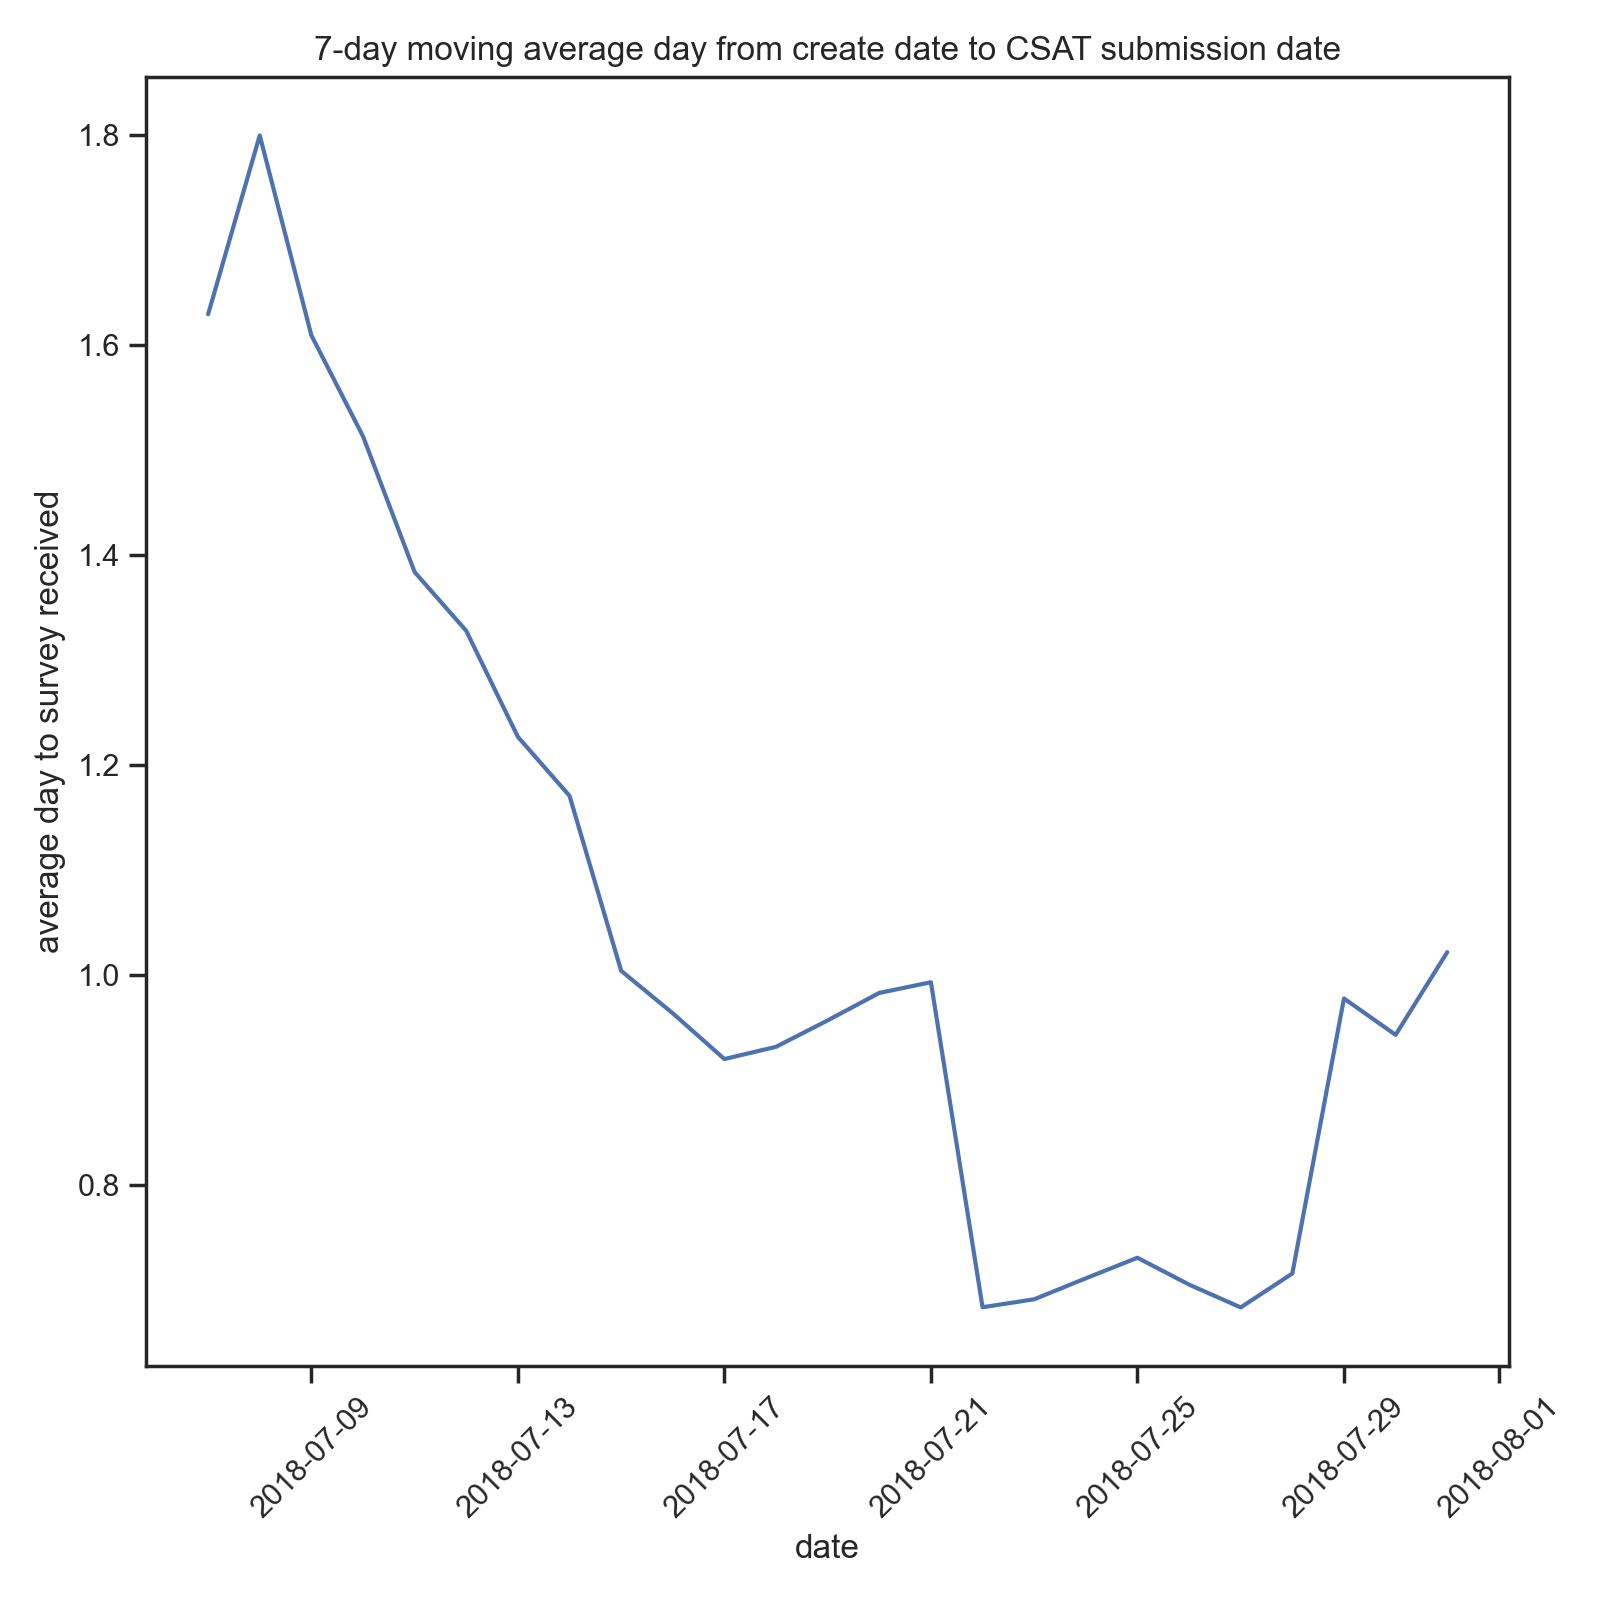

In [70]:
regexp = r"[ก-๙a-zA-Z']+"
path = '/Users/ice/Desktop/CASE/THSarabunNew/THSarabunNew.ttf'

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_raw.Subject:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                font_path=path,
                background_color ='white',
                stopwords = stopwords,
                regexp=regexp,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# wordcloud.to_file("most_comment_on_subj.png")

In [95]:
plt.clf()
# date = df_raw.iloc[6:,-3].sort_values()
avg_7_c_s_gb = df_raw.groupby('date_c')['date_c_s'].mean()
avg_7_c_s = avg_7_c_s_gb.rolling(7).mean().fillna(0).reset_index()


date = avg_7_c_s.iloc[6:,0]
avg_7 = avg_7_c_s.iloc[6:,1]


plt.plot(date, avg_7)
plt.title('7-day moving average day from create date to case solved')
plt.xlabel('date')
plt.ylabel('average day to case sloved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('c_trend.png')

In [96]:
plt.clf()
# date = df_raw.iloc[6:,-2].sort_values()
avg_7_s_sb_gb = df_raw.groupby('date_s')['date_s_sb'].mean()
avg_7_s_sb = avg_7_s_sb_gb.rolling(7).mean().fillna(0).reset_index()


date_sb = avg_7_s_sb.iloc[6:,0]
avg_7_sb = avg_7_s_sb.iloc[6:,1]


plt.plot(date_sb, avg_7_sb)
plt.title('7-day moving average day from create date to CSAT submission date')
plt.xlabel('date')
plt.ylabel('average day to survey received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('sb_trend.png')

<IPython.core.display.Javascript object>


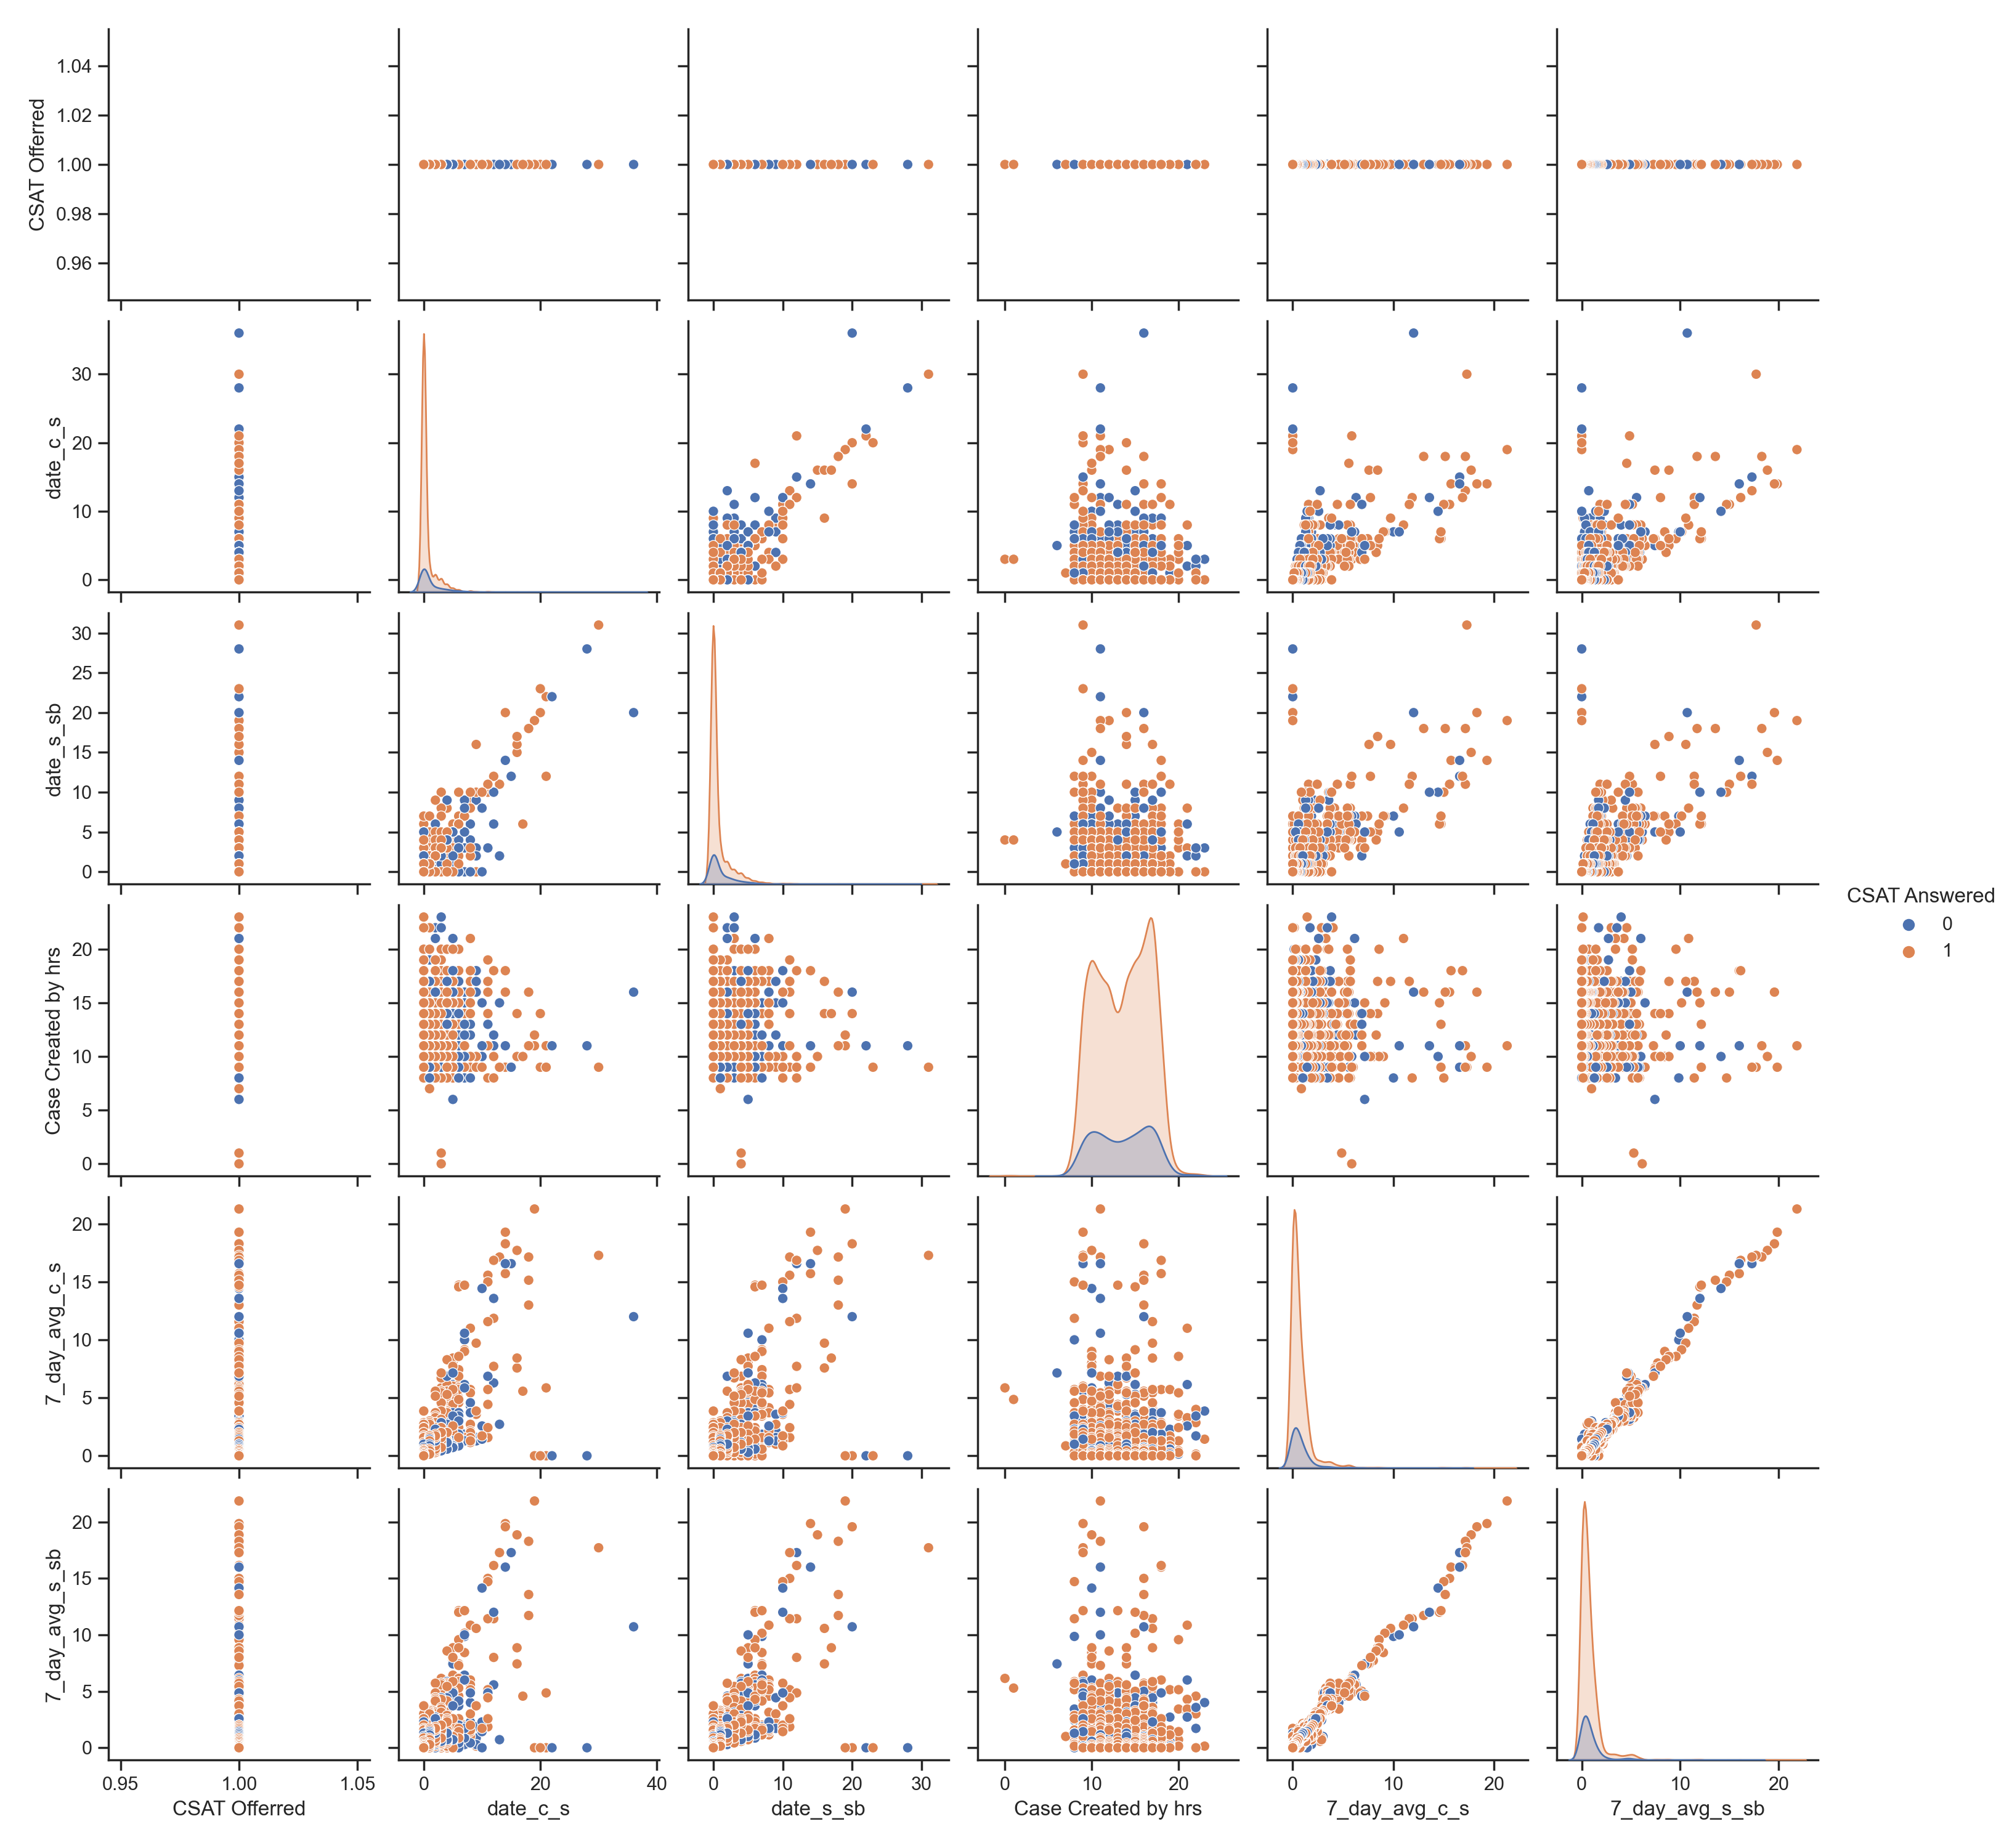

/Users/ice/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ice/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


In [97]:
df_raw.head()

corrMatrix = df_raw.corr()


sns.set_theme(style="ticks")
sns.pairplot(df_raw, hue='CSAT Answered')

In [98]:
corrMatrix

,CSAT Offerred,CSAT Answered,date_c_s,date_s_sb,Case Created by hrs,7_day_avg_c_s,7_day_avg_s_sb
CSAT Offerred,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAT Answered,NaN,1.000000,-0.113959,-0.071355,0.002060,-0.033027,-0.023830
date_c_s,NaN,-0.113959,1.000000,0.871797,-0.108853,0.666666,0.642068
date_s_sb,NaN,-0.071355,0.871797,1.000000,-0.080471,0.647284,0.675367
Case Created by hrs,NaN,0.002060,-0.108853,-0.080471,1.000000,-0.062313,-0.054107
7_day_avg_c_s,NaN,-0.033027,0.666666,0.647284,-0.062313,1.000000,0.964536
7_day_avg_s_sb,NaN,-0.023830,0.642068,0.675367,-0.054107,0.964536,1.000000


In [99]:
print(avg_7_s_sb)

        date_s  date_s_sb
0   2018-07-01   0.000000
1   2018-07-02   0.000000
2   2018-07-03   0.000000
3   2018-07-04   0.000000
4   2018-07-05   0.000000
5   2018-07-06   0.000000
6   2018-07-07   1.629526
7   2018-07-08   1.799856
8   2018-07-09   1.609463
9   2018-07-10   1.513286
10  2018-07-11   1.383996
11  2018-07-12   1.327984
12  2018-07-13   1.227029
13  2018-07-14   1.170894
14  2018-07-15   1.004227
15  2018-07-16   0.963758
16  2018-07-17   0.920185
17  2018-07-18   0.931844
18  2018-07-19   0.956995
19  2018-07-20   0.983177
20  2018-07-21   0.993327
21  2018-07-22   0.683804
22  2018-07-23   0.691389
23  2018-07-24   0.711359
24  2018-07-25   0.730938
25  2018-07-26   0.705377
26  2018-07-27   0.683614
27  2018-07-28   0.715964
28  2018-07-29   0.977868
29  2018-07-30   0.943208
30  2018-07-31   1.021964


In [100]:
print(avg_7_c_s_gb)

date_c
2018-06-07    28.000000
2018-06-12    21.000000
2018-06-13    21.000000
2018-06-15    19.500000
2018-06-16    19.000000
2018-06-17    14.000000
2018-06-18    15.400000
2018-06-19    21.500000
2018-06-20    12.333333
2018-06-21    10.500000
2018-06-22    11.500000
2018-06-23     8.000000
2018-06-25    12.000000
2018-06-26     7.571429
2018-06-27     5.275862
2018-06-28     4.285714
2018-06-29     3.457627
2018-06-30     2.264706
2018-07-01     1.550000
2018-07-02     0.688119
2018-07-03     0.614943
2018-07-04     0.545455
2018-07-05     0.526627
2018-07-06     0.469799
2018-07-07     0.797468
2018-07-08     0.875000
2018-07-09     0.327273
2018-07-10     0.546053
2018-07-11     0.339394
2018-07-12     0.402597
2018-07-13     0.635714
2018-07-14     0.968750
2018-07-15     1.300000
2018-07-16     0.440678
2018-07-17     0.641791
2018-07-18     0.411111
2018-07-19     0.483871
2018-07-20     0.572368
2018-07-21     0.510204
2018-07-22     0.625000
2018-07-23     0.312775
2018-07-2

In [101]:
case_hr = df_raw.groupby(['Case Created by hrs'])['Case Number'].nunique().reset_index()
case_hr.iloc[0,0] = 24
case_hr.sort_values('Case Created by hrs').reset_index(drop = True)

,Case Created by hrs,Case Number
0,1,1
1,6,1
2,7,1
3,8,61
4,9,388
5,10,451
6,11,396
7,12,381
8,13,294
9,14,392


In [102]:
case_d_hr = df_raw.groupby(['dof_c_s','Case Created by hrs'])['Case Number'].nunique().reset_index()
case_d_hr['Case Created by hrs'] = case_d_hr['Case Created by hrs'].apply(lambda hr : 24 if hr == 0 else hr)

case_d_hr.sort_values('Case Created by hrs').reset_index(drop = True)
# case_d_hr.to_csv('case_d_hr.csv')
case_d_hr.groupby(['dof_c_s','Case Created by hrs'])['Case Number'].mean().reset_index()

case_d_hr_a1 = case_d_hr.groupby(['dof_c_s'])['Case Number'].mean().reset_index()
case_d_hr_a2 = case_d_hr.groupby(['Case Created by hrs'])['Case Number'].mean().reset_index()
case_d_hr_a3 = case_d_hr.groupby(['dof_c_s','Case Created by hrs'])['Case Number'].mean().reset_index()

case_d_hr_a1.to_csv('case_d_hr1.csv')
case_d_hr_a2.to_csv('case_d_hr2.csv')
case_d_hr_a3.to_csv('case_d_hr3.csv')

In [103]:
avg_7_c_s_gb = df_raw.groupby(['dof_c_s'])['Case Number'].nunique().reset_index()
avg_7_c_s_gb.rename(columns={'dof_c_s' : 'day'})

,day,Case Number
0,Friday,572
1,Monday,932
2,Saturday,348
3,Sunday,97
4,Thursday,724
5,Tuesday,810
6,Wenesday,689


In [80]:
avg_7_c_s_gb = df_raw.groupby(['dof_c_s'])['Case Number'].nunique().reset_index()
avg_7_c_s_gb.rename(columns={'dof_c_s' : 'day'})

,day,Case Number
0,Friday,572
1,Monday,932
2,Saturday,348
3,Sunday,97
4,Thursday,724
5,Tuesday,810
6,Wenesday,689


In [81]:
avg_7_c_s_gb = df_raw.groupby(['dof_s_sb'])['Case Number'].nunique().reset_index()
avg_7_c_s_gb.rename(columns={'dof_s_sb' : 'day'})

,day,Case Number
0,Friday,558
1,Monday,969
2,Saturday,293
3,Sunday,41
4,Thursday,713
5,Tuesday,883
6,Wenesday,715


In [82]:
case_gb = df_raw.groupby(['Case Group','CSAT Answered word'])['Case Number'].count().reset_index()
case_gb

,Case Group,CSAT Answered word,Case Number
0,TH_Admin,bad,9
1,TH_Admin,good,32
2,TH_Content,bad,5
3,TH_Content,good,27
4,TH_Seller CI,good,5
5,TH_Seller Chat,bad,228
6,TH_Seller Chat,good,1298
7,TH_Seller Digital,bad,161
8,TH_Seller Digital,good,458
9,TH_Seller Dispute,bad,12


In [83]:
table = pd.pivot_table(df_raw, values='Case Number', index=['Case Group'],
                    columns=['CSAT Answered word'], aggfunc=lambda x: len(x.unique()), fill_value=0, margins=True)
table.to_csv('pivot_g_d.csv')

In [84]:
cha_gb = df_raw.groupby(['Case Channel','date_c'])['Case Number'].nunique().reset_index()
cha_gb = cha_gb.set_index('date_c')
cha_gb.T

date_c,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,...,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31
Case Channel,Chat,Chat,Chat,Chat,Chat,Chat,Chat,Chat,Chat,Chat,...,Web Form,Web Form,Web Form,Web Form,Web Form,Web Form,Web Form,Web Form,Web Form,Web Form
Case Number,3,7,4,7,5,76,71,78,66,62,...,14,56,35,38,22,11,12,12,23,19


In [85]:
table2 = pd.pivot_table(df_raw, values='Case Number', index=['date_c'],
                    columns=['Case Channel'], aggfunc=lambda x: len(x.unique()), fill_value=0, margins=True)
table2.to_csv('cha_date.csv')

In [86]:
table2 = pd.pivot_table(df_raw, values='Case Number', index=['date_c'],
                    columns=['Contact Reason'], aggfunc=lambda x: len(x.unique()), fill_value=0, margins=True)
table2.to_csv('cont_date.csv')

In [87]:
df_gb_5 = df_raw.groupby(['date_c','dof_c_s'])['Case Number'].nunique().reset_index()
df_gb_5
df_gb_6 = df_gb_5.groupby('dof_c_s')['Case Number'].mean()
# df_gb_6.to_csv('xxx.csv')

In [88]:
df_gb_7 = df_raw.groupby(['date_c','Case Created by hrs'])['Case Number'].nunique().reset_index()
df_gb_7
df_gb_8 = df_gb_7.groupby('Case Created by hrs')['Case Number'].mean()
df_gb_8
# df_gb_8.to_csv('xxxxxxx.csv')

Case Created by hrs
0      1.000000
1      1.000000
6      1.000000
7      1.000000
8      2.346154
9      9.700000
10    11.868421
11     9.428571
12    10.297297
13     8.647059
14    10.594595
15    12.818182
16    12.500000
17    15.972222
18    10.392857
19     3.153846
20     1.800000
21     2.333333
22     1.200000
23     1.500000
Name: Case Number, dtype: float64

In [89]:
df_gb_9 = df_raw.groupby(['date_c','dof_c_s','Case Created by hrs'])['Case Number'].nunique().reset_index()
df_gb_9['Case Created by hrs'] = df_gb_9['Case Created by hrs'].apply(lambda hr : 24 if hr == 0 else hr)
df_gb_10 = df_gb_9.groupby(['dof_c_s','Case Created by hrs'])['Case Number'].mean()
df_gb_10.reset_index()
df_gb_10.to_csv('XXXXXXXXXXXXXX.csv')